In [2]:
from skimage import data
from skimage import color
from skimage.filters import meijering, sato, frangi, hessian
import skimage.filters as filters
from skimage import io

import numpy as np

import matplotlib.pyplot as plt

# Scikit demo

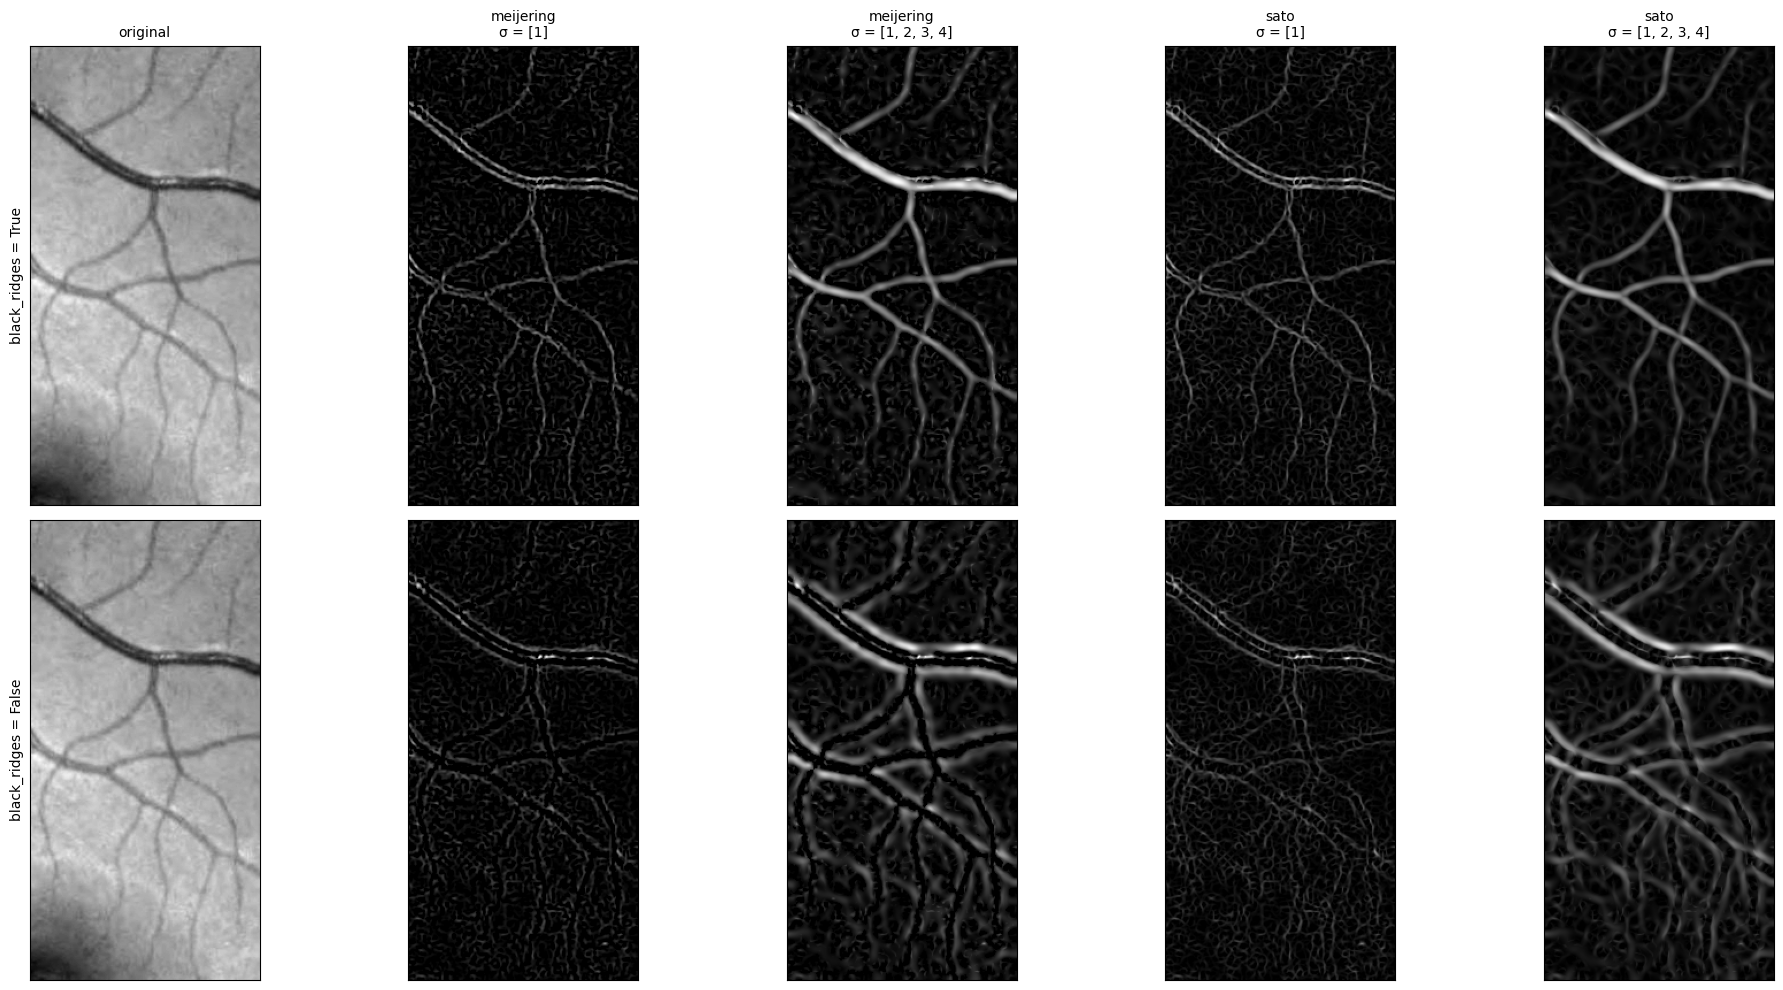

In [6]:

def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image


image = color.rgb2gray(data.retina())[300:700, 700:900]
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(20, 10)).subplots(2, 5)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            #(frangi, [1]),
            #(frangi, range(1, 5)),
            #(hessian, [1]),
            #(hessian, range(1, 5)),
        ]
    ):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

# Trying on our data

(7, 512, 512)


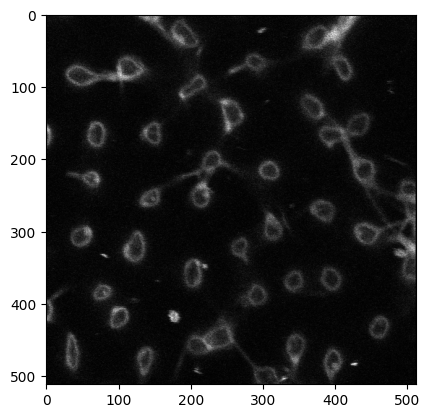

In [4]:
PATH = r"/home/xpetrus/Desktop/DP/Datasets/TNT_data/180322_Sqh-mCh Tub-GFP 16h_110_time-10.tif.files.tif"
stack_raw = io.imread(PATH)
print(stack_raw.shape)

plt.figure()
plt.imshow(stack_raw[0], 'gray')


KeyboardInterrupt: 

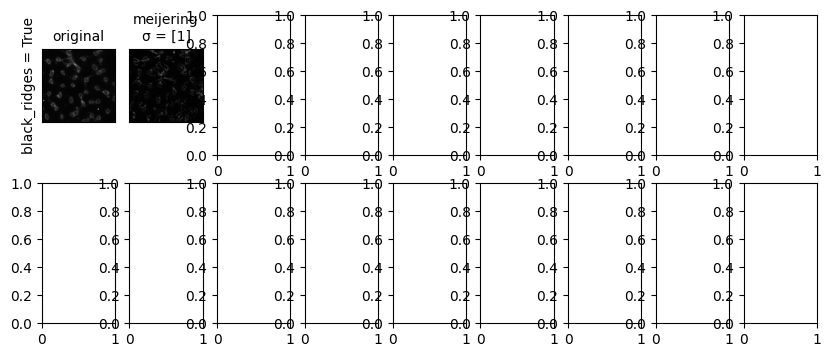

In [5]:
plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
        ]
    ):
        result = func(stack_raw, black_ridges=black_ridges, sigmas=sigmas)
        result = result[3,:,:]
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

Let's explore the meijering operator further.

In [ ]:
stack_raw = io.imread(PATH)
print(stack_raw.shape)

# Percentile stretch
p5, p95 = np.percentile(stack_raw, (5, 95))
stack = np.clip(stack_raw, p5, p95)

# Normalise
stack = (stack - stack.min()) / (stack.max() - stack.min())
stack *= 255

fig, ax = plt.subplots(ncols=1)
ax.imshow(np.max(stack, axis=0), 'gray')
ax.set_title("Maximum projection along z axis")

In [ ]:
parameter_comb = [
    [1],
    # [1, 2, 3],
    [1, 2],
    # [1,4],
    # [1,2,3,4],
    [1, 2, 3]
]

smoothing_list = [
    1,
    2,
    5,
    10,
]

axes = plt.figure(figsize=(30, 30)).subplots(nrows=len(parameter_comb), ncols=len(smoothing_list)+1)
# axes = axes.flatten()
for i, comb in enumerate(parameter_comb):
    for j, smoothing_term in enumerate(smoothing_list):
        if 

        # Smooth
        smoothed = filters.gaussian(stack, sigma=smoothing_term)

        # Run the algorithm
        result = meijering(smoothed, sigmas=comb, black_ridges=False)
        # result = smoothed

        # Maximum projection along z axis
        result = np.max(result, axis=0)

        # Plot
        axes[j][i].imshow(result, 'gray')
        axes[j][i].set_xticks([])
        axes[j][i].set_yticks([])
        